In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection                import train_test_split

import tensorflow
from tensorflow                             import data
from tensorflow                             import keras
from tensorflow.keras.preprocessing         import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image   import load_img,img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.layers                import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras.applications          import VGG16, MobileNet
from tensorflow.keras.callbacks             import EarlyStopping



In [2]:
test_data = image_dataset_from_directory(
    directory='output/val',
    labels='inferred',
    label_mode='categorical',
    seed=123,
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

Found 7387 files belonging to 62 classes.


In [3]:
Regular_NN = keras.models.load_model("Initial_NN_model_2Dec-2")
Mobile_Plus_NN = keras.models.load_model("Transfer_Plus_model_2Dec-2")


In [4]:
def real_life_images(path):
    values = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
    values = list(values)
    img = image.load_img(path, target_size=(128, 128))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = img_array.reshape(-3, 128, 128, 3)
    img_preprocessed = preprocess_input(img_array)
    predictions = probability_model.predict(img_preprocessed)
    df = pd.DataFrame(predictions, columns = values)
    predicted_value = df.idxmax(axis=1)
    print('The model predicts the image to be: ' + predicted_value)


In [37]:
probability_model = tensorflow.keras.Sequential([Mobile_Plus_NN, 
                                         tensorflow.keras.layers.Softmax()])

0    The model predicts the image to be: d
dtype: object


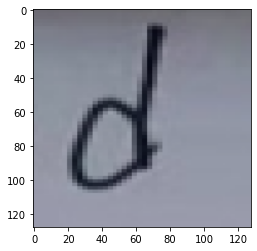

In [60]:
real_life_images('Real_Life_Text/monad_d.png')

In [7]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay 


In [8]:
predictions = probability_model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_pred

array([24, 24,  0, ..., 61,  7, 61])

In [9]:
true_categories = tensorflow.concat([y for x, y in test_data], axis=0)
y_true = np.argmax(true_categories, axis=1)
y_true

array([ 0,  0,  0, ..., 61, 61, 61])

In [10]:
errors = np.vstack((y_true,y_pred))
errors_df = pd.DataFrame(errors)
errors_df_t = errors_df.T
errors_df_t = errors_df_t.rename(columns={0: "true", 1: "predicted"})
errors_df_t['error'] = np.where(errors_df_t['true'] != errors_df_t['predicted']
                     , 1, 0)


In [11]:
(errors_df_t['error'].sum())/(len(errors_df_t['error']))

0.18979287938269934

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))

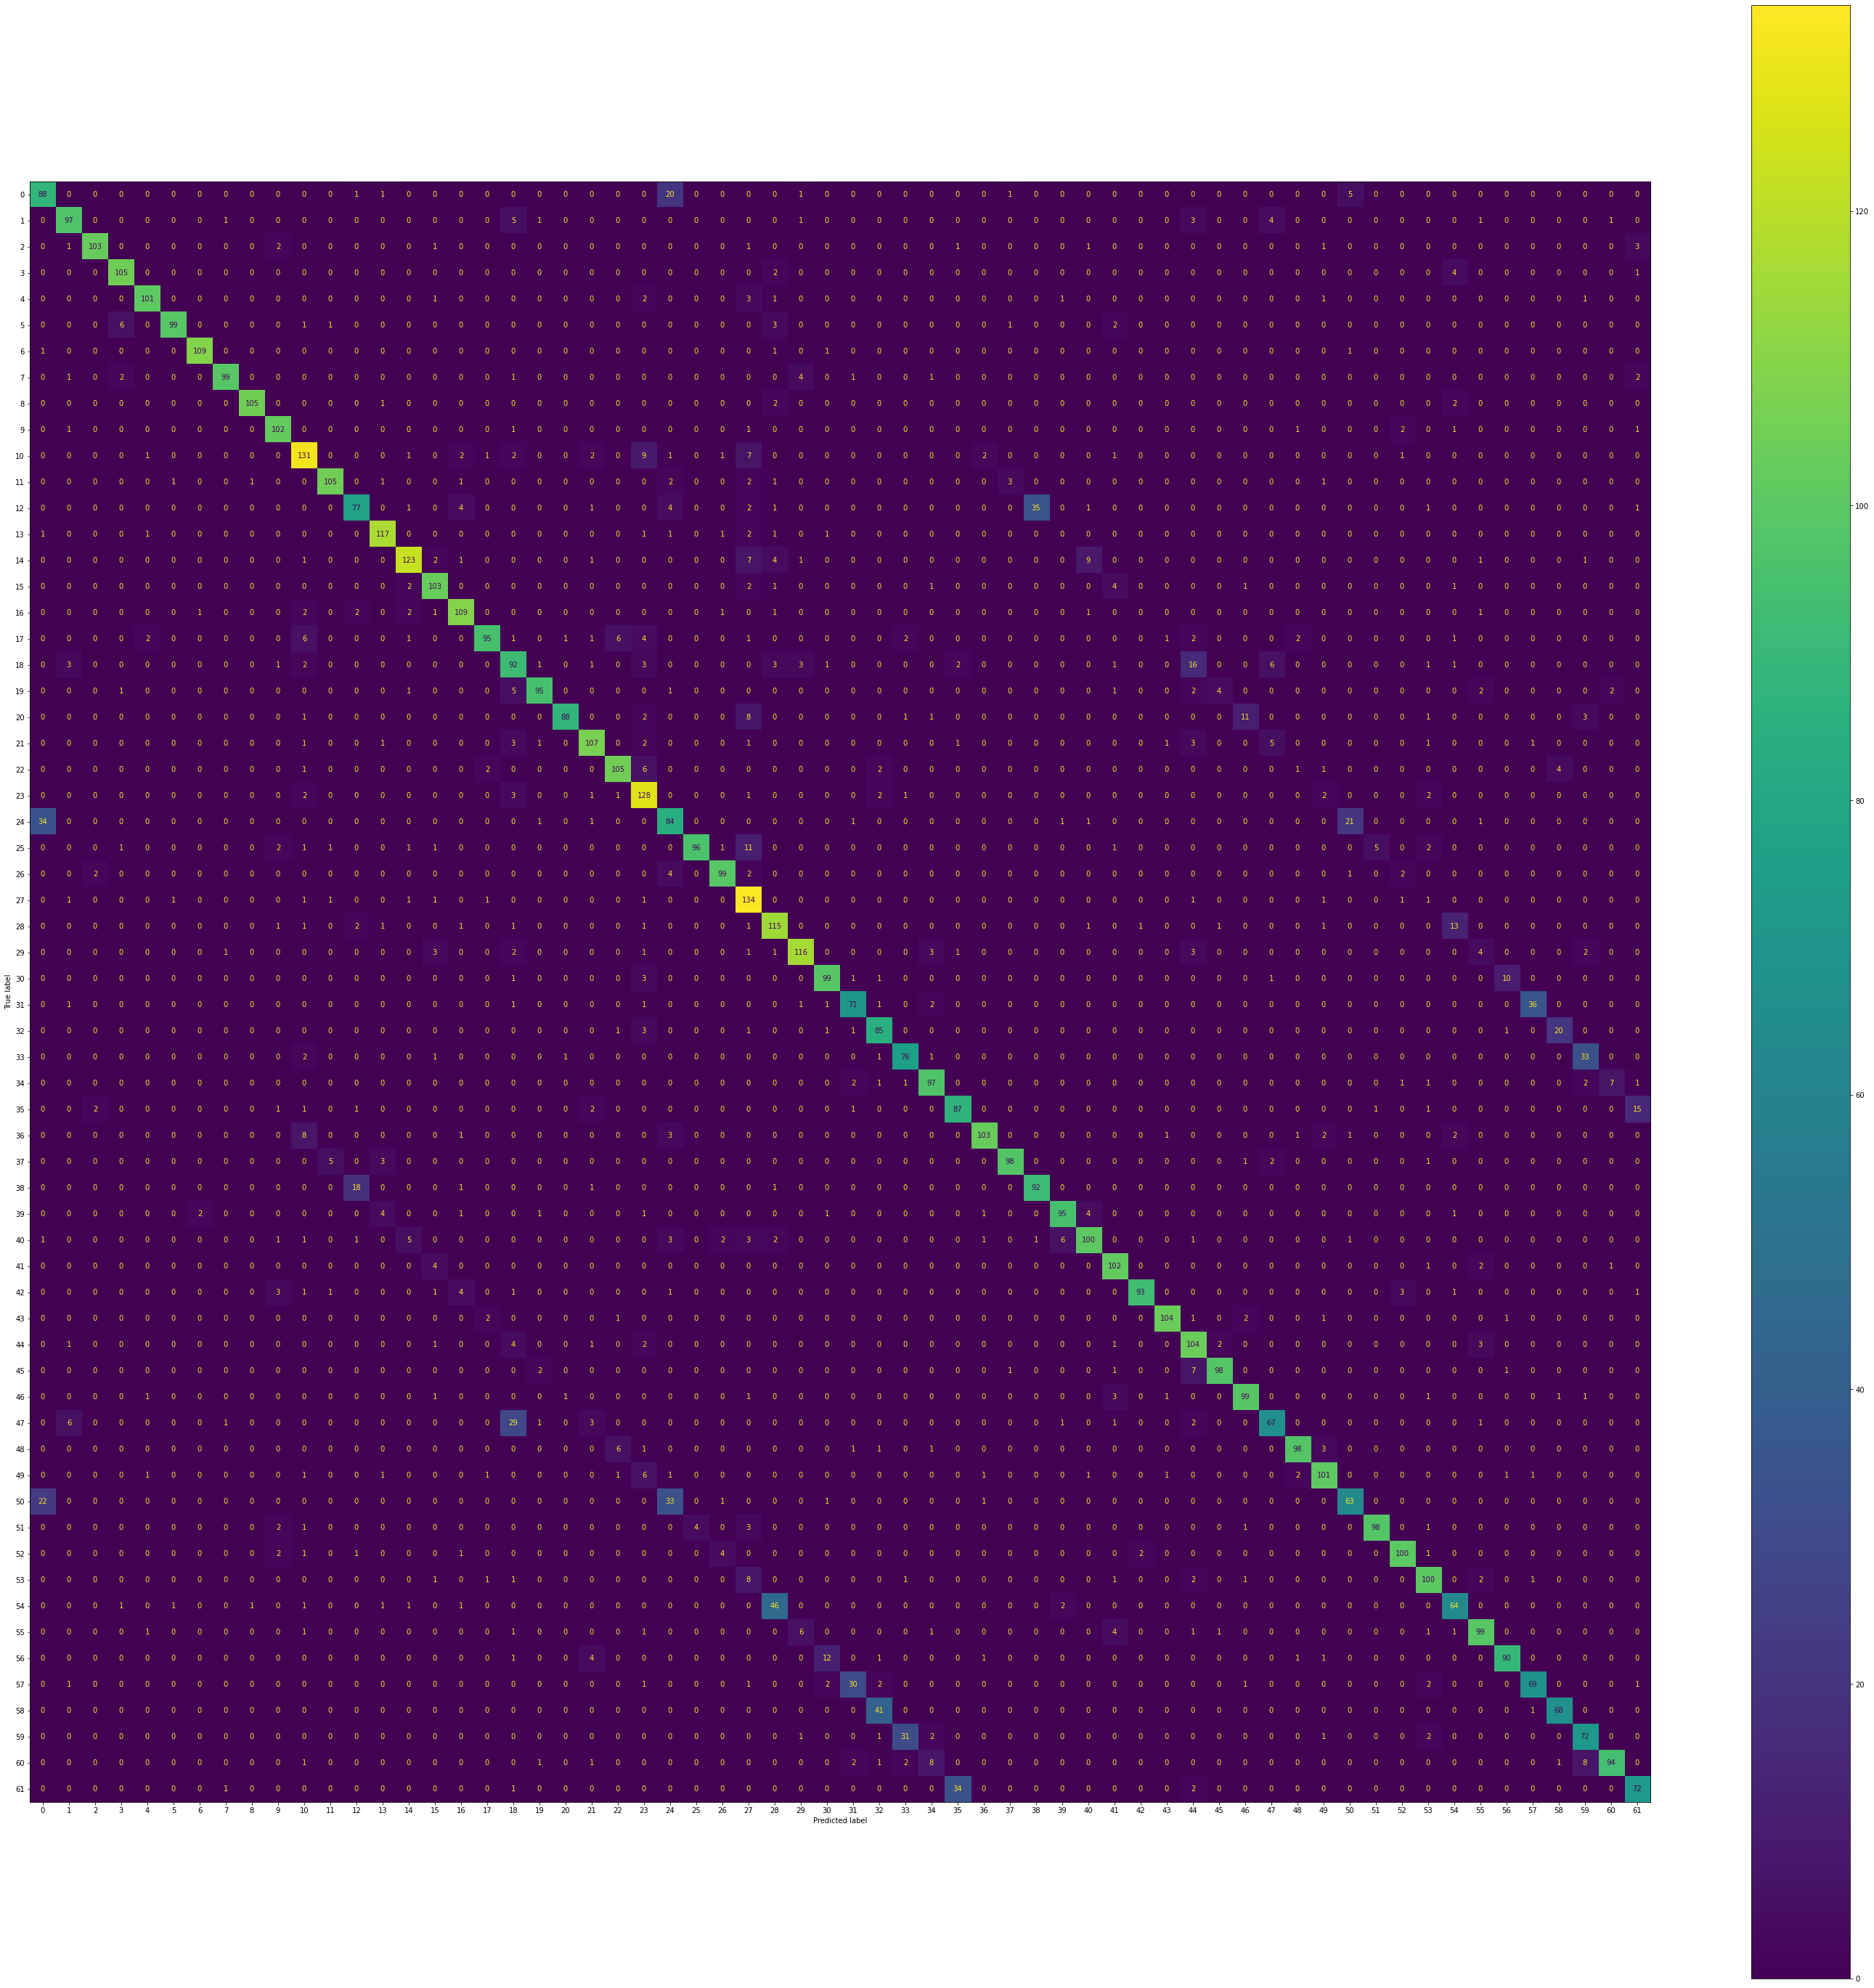

In [13]:
cm = confusion_matrix(y_true, y_pred)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(50,50))
cmp.plot(ax=ax)

In [14]:
errors_df_t

,true,predicted,error
0,0,24,1
1,0,24,1
2,0,0,0
3,0,24,1
4,0,24,1
...,...,...,...
7382,61,18,1
7383,61,61,0
7384,61,61,0
7385,61,7,1


In [15]:
values = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
values = list(values)

In [16]:
true_names = []
for i in errors_df_t.true:
    for v in values:
        if str(i) == str(values.index(v)):
            i = v
    true_names.append(i)
        

In [17]:
errors_df_t['true_names'] = true_names

In [18]:
true_values = []
for i in errors_df_t.predicted:
    for v in values:
        if str(i) == str(values.index(v)):
            i = v
    true_values.append(i)

In [19]:
errors_df_t['true_values'] = true_values

In [20]:
mask = (errors_df_t['error'] == 1)

In [21]:
errors_df_t2 = errors_df_t[mask]

In [22]:
errors_df_t2

,true,predicted,error,true_names,true_values
0,0,24,1,0,O
1,0,24,1,0,O
3,0,24,1,0,O
4,0,24,1,0,O
8,0,29,1,0,T
...,...,...,...,...,...
7369,61,35,1,z,Z
7377,61,35,1,z,Z
7378,61,35,1,z,Z
7382,61,18,1,z,I


In [23]:
erroneous_letters = errors_df_t2['true_names'].value_counts()

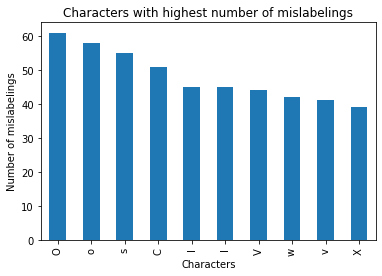

In [24]:
type(erroneous_letters.head(10).plot.bar())
plt.title('Characters with highest number of mislabelings')
plt.ylabel('Number of mislabelings')
plt.xlabel('Characters')

plt.show()


In [76]:
import plotly.figure_factory as ff
import plotly.graph_objects as go


z = confusion_matrix(y_true, y_pred)

x = values
y =  values

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text
                                 )

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.5,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

fig.layout.update(
  go.Layout(
    width=1100, height=1100
  )
)
# add colorbar
fig['data'][0]['showscale'] = True
fig.show()



In [82]:
import chart_studio
chart_studio.tools.set_credentials_file(username='walter.tyrna', api_key='Y8jnb5RFfUA5fjvqLY9T')
chart_studio.tools.set_config_file(world_readable=True, sharing='public')

In [83]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [84]:
py.plot(fig, filename = 'confusion_matrix', auto_open=True)

'https://plotly.com/~walter.tyrna/3/'